In [1]:
import logging as lg
from pathlib import Path
from keras.utils import to_categorical
from keras.datasets import boston_housing
import numpy as np
%matplotlib inline

Using TensorFlow backend.


In [12]:
INPUT_DIM=13
VALID_RATE=0.2
BATCH_SIZE=20
RESULT_DIR=Path(f"result/boston_{BATCH_SIZE}_{VALID_RATE}")

In [3]:
from tools.models import MLPRegressor

In [4]:
verbose=True
RESULT_DIR=Path("result")
if verbose:
    lg.getLogger().setLevel(lg.INFO)
    lg.info("Verbose mode activated")

INFO:root:Verbose mode activated


In [5]:
(X_train_val, y_train_val), (X_test, y_test) = boston_housing.load_data()

In [6]:
X_train_val.shape,y_train_val.shape,X_test.shape,y_test.shape

((404, 13), (404,), (102, 13), (102,))

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_valid,y_train,y_valid=train_test_split(X_train_val, y_train_val, test_size=VALID_RATE)

In [14]:
mlp=MLPRegressor(result_dir=RESULT_DIR,input_dim=INPUT_DIM)

INFO:root:Not found such a trained model.
INFO:root:Creating new model...
INFO:root:Finished.


In [15]:
history=mlp.fit(X_train,y_train,10,BATCH_SIZE,X_valid,y_valid)

Train on 323 samples, validate on 81 samples
Epoch 1/10
323/323 [==============================] - 0s 929us/step - loss: 632.5976 - val_loss: 231.0542
Epoch 2/10
323/323 [==============================] - 0s 144us/step - loss: 142.0995 - val_loss: 68.9616
Epoch 3/10
323/323 [==============================] - 0s 146us/step - loss: 79.3851 - val_loss: 76.7132
Epoch 4/10
323/323 [==============================] - 0s 146us/step - loss: 60.4372 - val_loss: 77.2457
Epoch 5/10
323/323 [==============================] - 0s 149us/step - loss: 59.2866 - val_loss: 87.0512
Epoch 6/10
323/323 [==============================] - 0s 146us/step - loss: 63.7763 - val_loss: 58.6577
Epoch 7/10
323/323 [==============================] - 0s 145us/step - loss: 50.6181 - val_loss: 54.5970
Epoch 8/10
323/323 [==============================] - 0s 145us/step - loss: 52.1371 - val_loss: 64.7566
Epoch 9/10
323/323 [==============================] - 0s 144us/step - loss: 54.0162 - val_loss: 50.2762
Epoch 10/10
323/

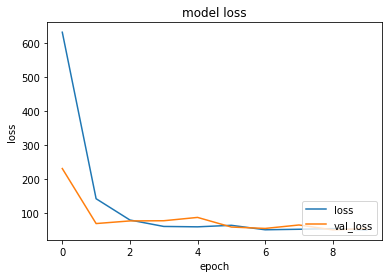

In [16]:
mlp.plot_history(epoch=10)

In [17]:
mlp=MLPRegressor(result_dir=RESULT_DIR,input_dim=INPUT_DIM,trained_epochs=10)
mlp.evaluate(X_test,y_test)

INFO:root:Loading the trained model...
INFO:root:Loaded.


102/102 [==============================] - 0s 612us/step


{'loss': 56.55920888863358}